In [1]:
import xgboost as xgb
import matplotlib.pyplot as plt
from pylab import plot, show, subplot, specgram, imshow, savefig
import pandas as pd
import operator
import graphviz as gv
%matplotlib inline

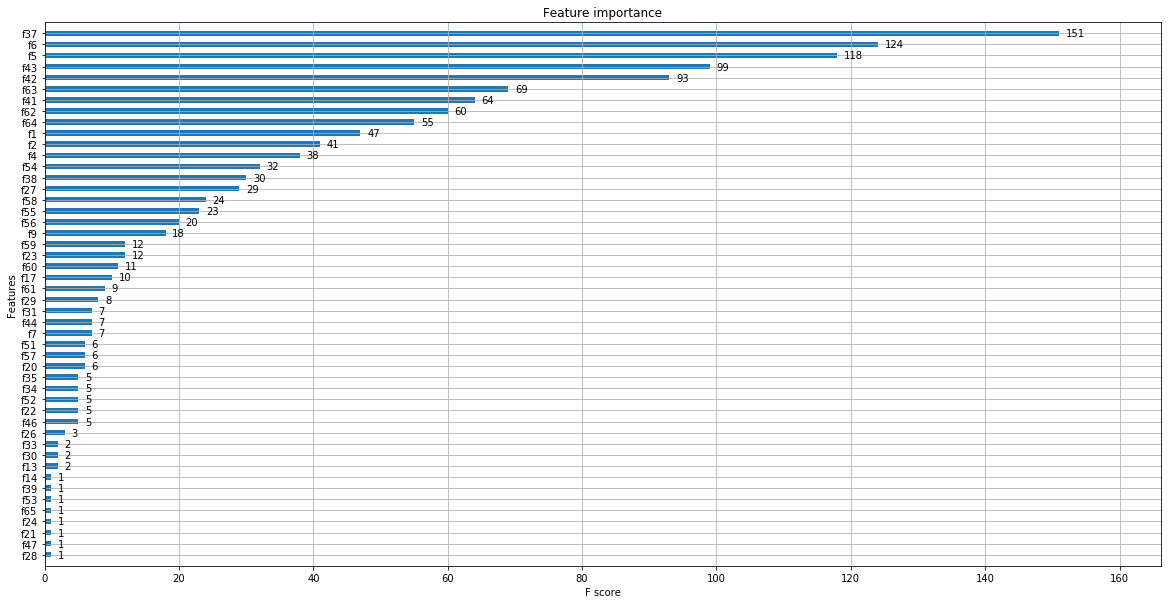

In [26]:
#load model
bst = xgb.Booster()
bst.load_model('testRand_yuqibenjin.model')
#bst.dump_model('xgbrand_uni.dump', fmap='xgb_uni.fmap', with_stats=True)

#The feature importance of xgb
fig, ax = plt.subplots(figsize=(20, 10))
xgb.plot_importance(bst, height=0.5, ax=ax)

                                              feature  fscore
0                                          Nian_Ling_     151
1                               He_Tong_Jin_E_(Yuan_)     124
2                                   He_Tong_Li_Lu_(%)     118
3                   Mei_Qi_Chang_Huan_Ben_Jin_(Yuan_)      99
4                     Mei_Qi_Chang_Huan_Li_Xi_(Yuan_)      93
5                                      Qi_Shi_Ri__day      69
6                                      Xing_Bie_=Nan_      64
7                              Dai_Kuan_Qi_Shu_(Yue_)      60
8                                    Qi_Shi_Ri__month      55
9                                      Dao_Qi_Ri__day      47
10                                   Dao_Qi_Ri__month      41
11                                   Sheng_Yu_Qi_Shu_      38
12                    Xing_Ye_=Zai_Xiao_Da_Xue_Sheng_      32
13                                  Dang_Qian_Qi_Shu_      30
14                              Di_Qu_=Hu_Nan_Fen_Bu_      29
15      

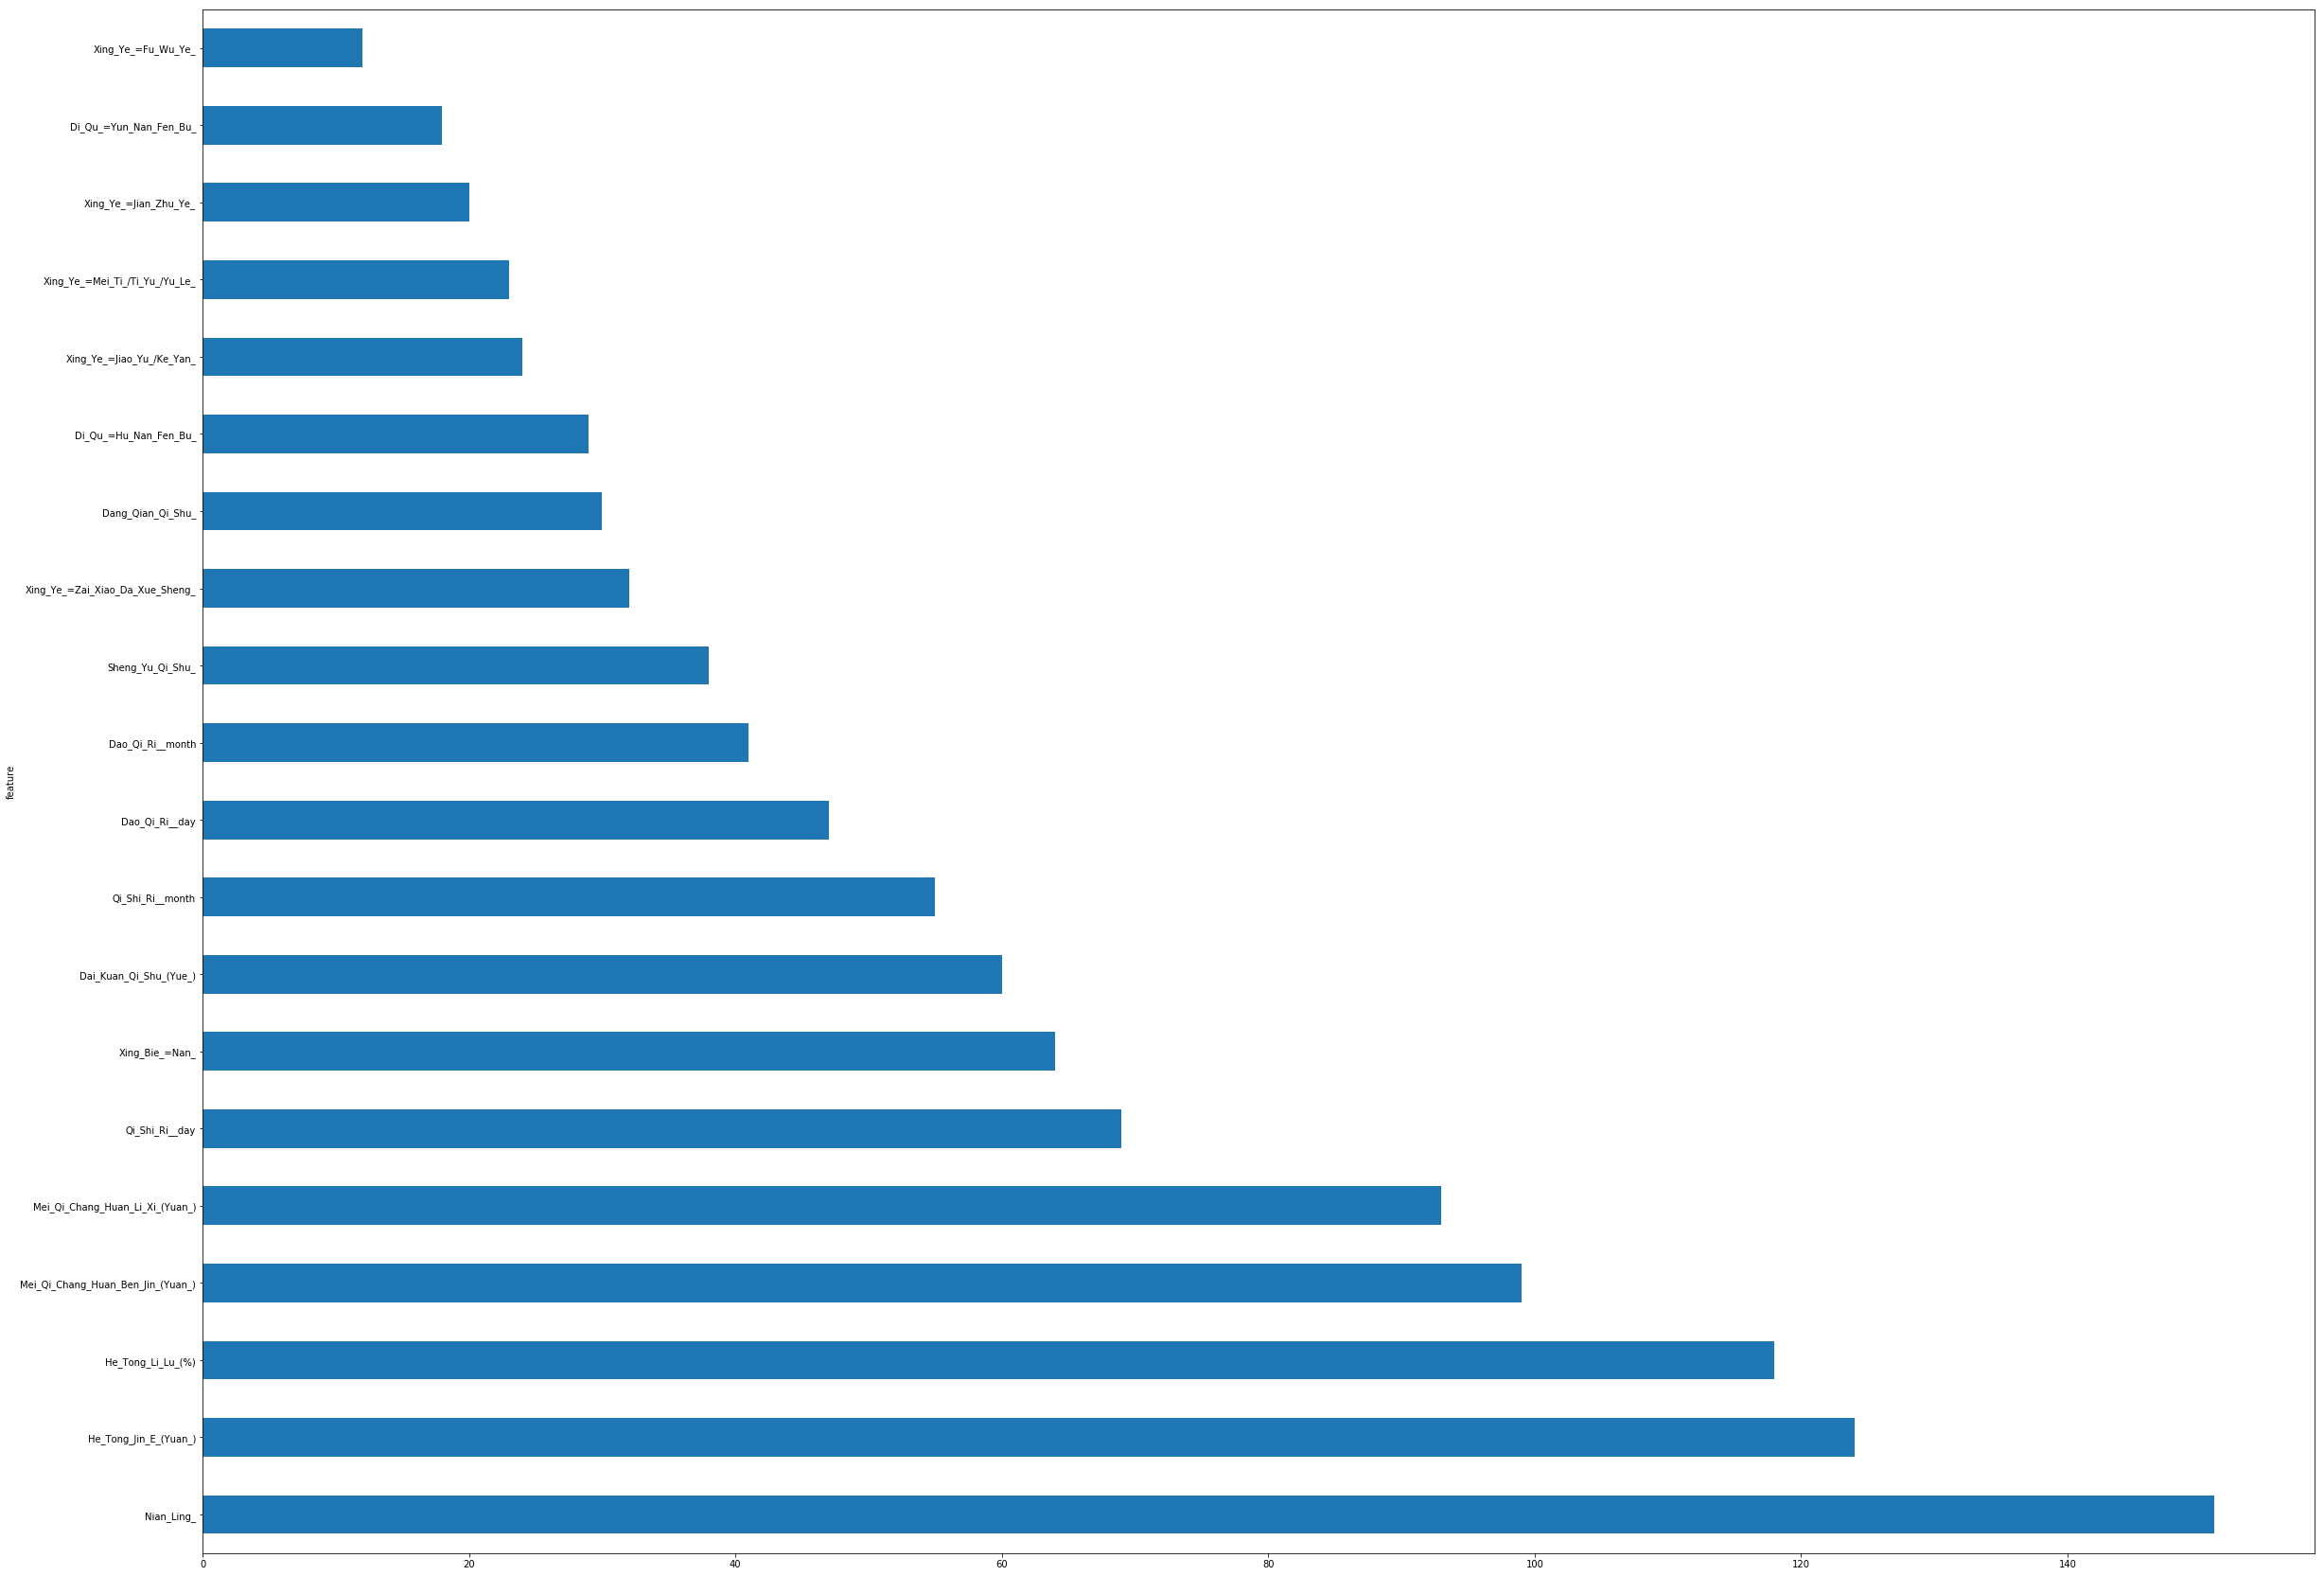

In [27]:
importance = bst.get_score(fmap='xgbRand_yuqibenjin.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1), reverse=True)

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
#df['feature'] = df['feature'].map(lambda x : x.encode('u8'))
print df

plt.figure()
num_f = 20
df[:num_f].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(40, 30))
#plt.gcf().savefig('features_importance.png')

Format: "png" not recognized. Use one of: canon cmap cmapx cmapx_np dot dot_json eps fig gv imap imap_np ismap json json0 mp pic plain plain-ext pov ps ps2 svg svgz tk vml vmlz xdot xdot1.2 xdot1.4 xdot_json


CalledProcessError: Command '['dot', '-Tpng']' returned non-zero exit status 1

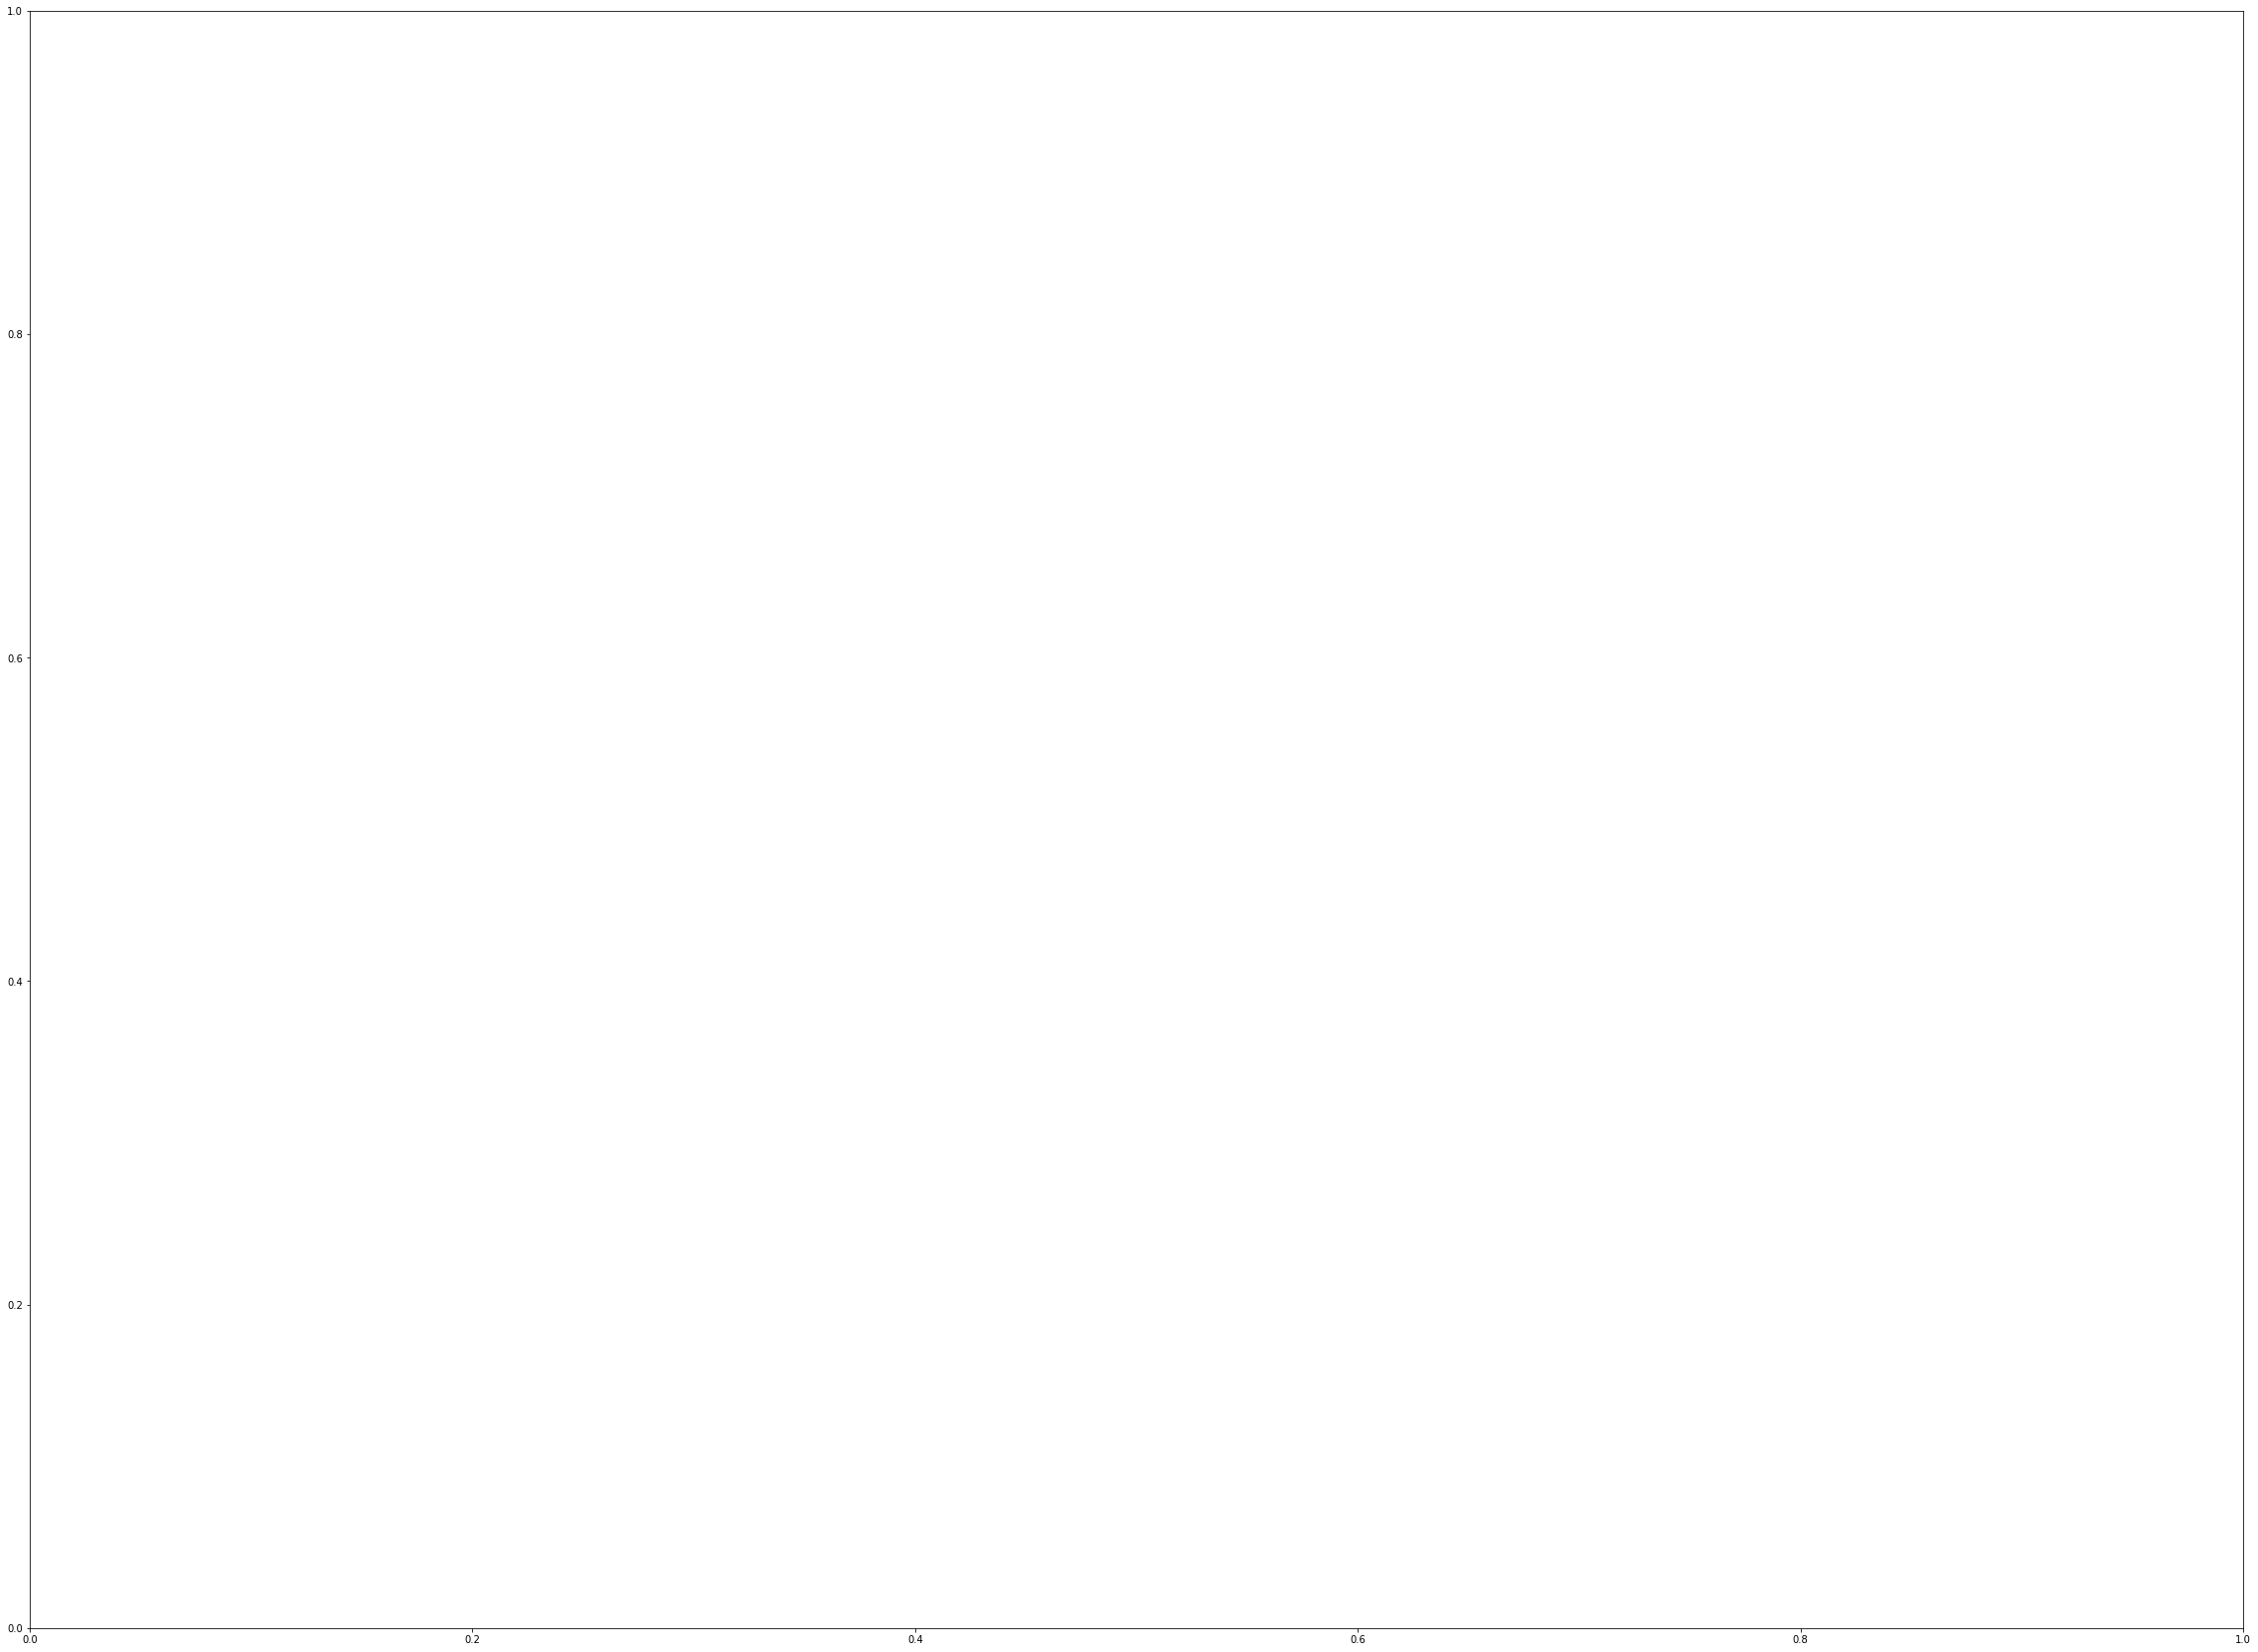

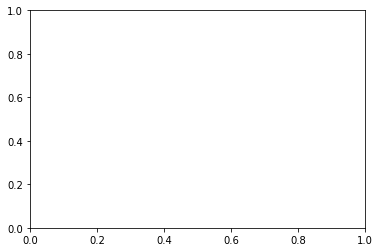

In [7]:
fig, ax = plt.subplots(figsize=(40, 30))
xgb.plot_tree(bst, fmap='xgbrand.fmap')
#graph = xgb.to_graphviz(bst, fmap='xgb_uni.fmap', ax=ax)

In [ ]:
df = pd.read_csv('data/train.csv', encoding='u8')

In [ ]:
for cl in df.columns:
    plt.figure()
    df[cl].hist(figsize=(20,10))

In [ ]:
def extract(x, n):
    l = x.split('|')
    for elm in l:
        v = elm.split(':')
        if int(v[0]) == n:
            return int(float(v[1]))
    #print n
    raise Exception('no such period')

num = 3
#f_list = [u'本期逾期天数']
#f_list = [u'历史逾期次数']
#f_list=[u'逾期本金（元）']
f_list = [u'历史最长逾期天数']
df = data[f_list]
#[(data[u'标注']==0) & (data[u'贷款期数（月）'] == num)][f_list][:100]
for f in f_list:
    for i in xrange(2, num):
        df.loc[:, str(i)+'th_'+f] = df[f].apply(extract, args=(i,))
df

In [ ]:
df[u'5th'].value_counts()

In [ ]:
data[u'贷款期数（月）'].value_counts()

In [ ]:
df[u'4th_本期逾期天数'].describe()

In [ ]:
data[u'还款间隔（月）'].value_counts()

In [ ]:
matplotlib.get_configdir()